## Libraries

In [18]:
import pandas as pd
import numpy as np
import scipy.stats as stat

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (18.5 * 0.65, 10.5 * 0.65)

from mlgear.utils import show, display_columns
from surveyweights import run_weighting_iteration, run_weighting_scheme, normalize_weights

## Load Processed Data

In [19]:
survey = pd.read_csv('responses_processed.csv')

## Weighting

In [20]:
demographics = ['gender', 'race', 'education', 'urban_rural', 'income', 'age', 'vote2016', 'region',
                'gss_trust', 'gss_bible', 'gss_spanking']

In [21]:
run_weighting_iteration(survey, weigh_on=demographics)

## gender ##
Female               1.185909
Male                 1.187571
Other                0.451289
Prefer not to say    1.175231
dtype: float64
ERROR: 0.19232314413157078
-
-
## race ##
Asian or Asian American      0.334284
Black or African American    1.392203
Hispanic or Latino           1.749385
Other                        0.647642
White or Caucasian           0.876486
dtype: float64
ERROR: 0.28804931119485483
-
-
## education ##
Completed graduate school     0.227285
Graduated from college        0.185166
Graduated from high school    0.769529
Less than high school         3.495891
Some college, no degree       0.322129
dtype: float64
ERROR: 0.7112515081454488
-
-
## urban_rural ##
Rural       1.129149
Suburban    0.968318
Urban       0.902533
dtype: float64
ERROR: 0.06517481049731534
-
-
## income ##
Between $100,000 and $150,000    1.079493
Between $15,000 and $49,999      0.701713
Between $50,000 and $74,999      0.750524
Between $75,000 and $99,999      0.825708
Over $150,

{'errors': [0.19232314413157078,
  0.28804931119485483,
  0.7112515081454488,
  0.06517481049731534,
  0.37931138965298145,
  0.6644828079804144,
  0.24555474973650315,
  0.20288846816707784,
  0.0498911167979389,
  0.4933532148954337,
  0.49180119246980597],
 'error_table': {'education': 2.49589082790985,
  'age': 1.5227713704132109,
  'income': 1.2849469691230722,
  'gss_bible': 1.05052933335863,
  'race': 0.749384610100271,
  'vote2016': 0.6660331033181364,
  'gss_spanking': 0.6229290625675958,
  'gender': 0.5487111371286466,
  'region': 0.4233518738136339,
  'urban_rural': 0.12914931298371424,
  'gss_trust': 0.058241349251847985},
 'weights': {'gender': Female               1.185909
  Male                 1.187571
  Other                0.451289
  Prefer not to say    1.175231
  dtype: float64,
  'race': Asian or Asian American      0.334284
  Black or African American    1.392203
  Hispanic or Latino           1.749385
  Other                        0.647642
  White or Caucasian  

In [22]:
output = run_weighting_scheme(survey, iters=50, weigh_on=demographics, verbose=1)

ITER 1/1 - initialization - ERROR 50
ITER 2/50 - weight gender - ERROR 3.7840817136693454
ITER 3/50 - weight race - ERROR 3.581837073783632
ITER 4/50 - weight education - ERROR 3.326499312288478
ITER 5/50 - weight urban_rural - ERROR 2.7468361286477103
ITER 6/50 - weight income - ERROR 2.7167897755668284
ITER 7/50 - weight age - ERROR 2.69593545138137
ITER 8/50 - weight vote2016 - ERROR 2.693146116165451
ITER 9/50 - weight region - ERROR 2.224480120291157
ITER 10/50 - weight gss_trust - ERROR 1.7428818424922077
ITER 11/50 - weight gss_bible - ERROR 1.633000426862187
ITER 12/50 - weight gss_spanking - ERROR 1.440029532656399
ITER 13/50 - weight gender - ERROR 1.1988599279368246
ITER 14/50 - weight region - ERROR 1.050814262584369
ITER 15/50 - weight education - ERROR 0.9263556577121796
ITER 16/50 - weight vote2016 - ERROR 0.702770466756641
ITER 17/50 - weight race - ERROR 0.5582592629994121
ITER 18/50 - weight region - ERROR 0.5008578977121981
ITER 19/50 - weight age - ERROR 0.660135069

In [23]:
survey = output['final_df']
_ = run_weighting_iteration(survey, weigh_on=demographics)

## gender ##
Female               1.005968
Male                 1.006013
Other                0.993699
Prefer not to say    0.994320
dtype: float64
ERROR: 0.005993951081323668
-
-
## race ##
Asian or Asian American      1.006902
Black or African American    1.000274
Hispanic or Latino           0.999860
Other                        0.998851
White or Caucasian           0.994114
dtype: float64
ERROR: 0.004980019020029629
-
-
## education ##
Completed graduate school     1.0
Graduated from college        1.0
Graduated from high school    1.0
Less than high school         1.0
Some college, no degree       1.0
dtype: float64
ERROR: 1.1342059977299232e-15
-
-
## urban_rural ##
Rural       0.995254
Suburban    0.998513
Urban       1.006232
dtype: float64
ERROR: 0.003451115321483781
-
-
## income ##
Between $100,000 and $150,000    1.005218
Between $15,000 and $49,999      0.991299
Between $50,000 and $74,999      0.998210
Between $75,000 and $99,999      1.002199
Over $150,000               

## Likely Voter

In [24]:
survey['lv_index'] = 0
survey['rv_index'] = 0
survey.loc[survey['lv_thought'] == 'Quite a lot', 'lv_index'] += 1
survey.loc[survey['lv_thought'] == 'Some', 'lv_index'] += 0.7
survey.loc[(survey['lv_plan_vote'] == 'Yes'), 'lv_index'] += 1
survey.loc[(survey['lv_likely'] == 'Very likely'), 'lv_index'] += 1
survey.loc[(survey['lv_likely'] == 'Likely'), 'lv_index'] += 0.7
survey.loc[(survey['lv_likely'] == 'Somewhat likely'), 'lv_index'] += 0.4
survey.loc[(survey['lv_likely'] == 'Neither likely nor unlikely'), 'lv_index'] += 0.2
survey.loc[(survey['lv_likely'] == 'Somewhat unlikely'), 'lv_index'] += 0.1
survey.loc[(survey['lv_likely'] == 'Unlikely'), 'lv_index'] += 0.05
survey.loc[(survey['age'] == '18-24'), 'lv_index'] += 1
survey.loc[(survey['age'] != '18-24') & (survey['vote2016'] != 'Did not vote'), 'lv_index'] += 1
survey.loc[survey['vote_method_plan'].isin(['In person on election day',
                                            'In person before election day',
                                            'By mail, and I’ve already requested and received my mail-in ballot']),
           'lv_index'] += 1
survey.loc[survey['vote_method_plan'] == 'By mail, and I’ve already requested my mail-in ballot', 'lv_index'] += 0.8
survey.loc[survey['vote_method_plan'] == 'By mail, but I haven\'t requested my mail-in ballot yet', 'lv_index'] += 0.4
survey.loc[survey['lv_already_voted'] == 'Yes', 'lv_index'] = survey['lv_index'].max()
survey.loc[~(survey['lv_registered'] == 'Yes'), 'lv_index'] = 0
survey.loc[(survey['lv_registered'] == 'Yes'), 'rv_index'] = 1

# https://www.pewresearch.org/methods/2016/01/07/measuring-the-likelihood-to-vote/
perry_gallup_loadings = {7: 0.83, 6: 0.63, 5: 0.59, 4: 0.4, 3: 0.34, 2: 0.23, 1: 0.13, 0: 0.11}
survey['lv_index'] = survey['lv_index'].apply(lambda l: perry_gallup_loadings[int(np.round(l * 2 * 0.7))])

print('Estimated voting population: {}%'.format(np.round((survey['lv_index'] * survey['weight'] * 100).mean(), 1)))
print('Estimated registered voters: {}%'.format(np.round((survey['rv_index'] * survey['weight'] * 100).mean(), 1)))

Estimated voting population: 68.3%
Estimated registered voters: 87.6%


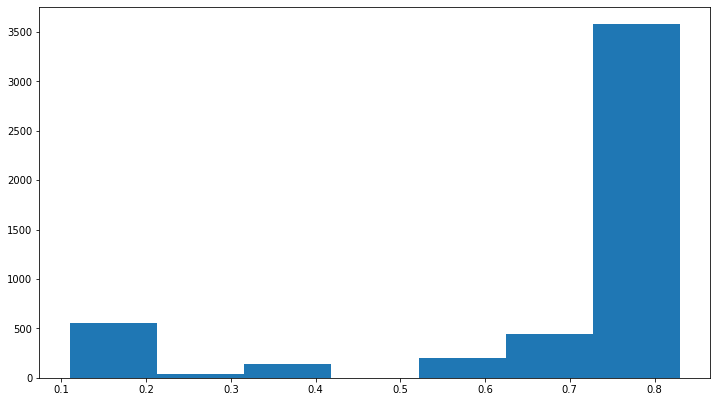

In [25]:
plt.hist(survey['lv_index'], bins=7)
plt.show()

In [26]:
survey['lv_index'].value_counts()

0.83    3574
0.11     510
0.63     438
0.59     203
0.40      72
0.34      63
0.23      42
0.13      42
Name: lv_index, dtype: int64

In [27]:
survey['lv_weight'] = normalize_weights(survey['weight'] * survey['lv_index'])
survey['rv_weight'] = normalize_weights(survey['weight'] * survey['rv_index'])
print(survey['lv_weight'].mean())
print(survey['rv_weight'].mean())

1.0
1.0


In [28]:
survey.to_csv('repsonses_processed_national_weighted.csv', index=False)

## California Propositions

In [29]:
ca_national_survey = survey.copy()
demographics = ['gender', 'race', 'education', 'urban_rural', 'income', 'age', 'vote2016']
run_weighting_iteration(ca_national_survey, weigh_on=demographics)

## gender ##
Female               1.005968
Male                 1.006013
Other                0.993699
Prefer not to say    0.994320
dtype: float64
ERROR: 0.005993951081323668
-
-
## race ##
Asian or Asian American      1.006902
Black or African American    1.000274
Hispanic or Latino           0.999860
Other                        0.998851
White or Caucasian           0.994114
dtype: float64
ERROR: 0.004980019020029629
-
-
## education ##
Completed graduate school     1.0
Graduated from college        1.0
Graduated from high school    1.0
Less than high school         1.0
Some college, no degree       1.0
dtype: float64
ERROR: 1.1342059977299232e-15
-
-
## urban_rural ##
Rural       0.995254
Suburban    0.998513
Urban       1.006232
dtype: float64
ERROR: 0.003451115321483781
-
-
## income ##
Between $100,000 and $150,000    1.005218
Between $15,000 and $49,999      0.991299
Between $50,000 and $74,999      0.998210
Between $75,000 and $99,999      1.002199
Over $150,000               

{'errors': [0.005993951081323668,
  0.004980019020029629,
  1.1342059977299232e-15,
  0.003451115321483781,
  0.006587202374566294,
  0.0033300110365278605,
  0.0015992997999689643],
 'error_table': {'income': 0.012067180067880656,
  'race': 0.006901792691453634,
  'gender': 0.006300677178479597,
  'urban_rural': 0.0062324313275059495,
  'age': 0.006034303531826435,
  'vote2016': 0.004817660508049992,
  'education': 2.220446049250313e-15},
 'weights': {'gender': Female               1.005968
  Male                 1.006013
  Other                0.993699
  Prefer not to say    0.994320
  dtype: float64,
  'race': Asian or Asian American      1.006902
  Black or African American    1.000274
  Hispanic or Latino           0.999860
  Other                        0.998851
  White or Caucasian           0.994114
  dtype: float64,
  'education': Completed graduate school     1.0
  Graduated from college        1.0
  Graduated from high school    1.0
  Less than high school         1.0
  Some

In [30]:
output = run_weighting_scheme(ca_national_survey, iters=50, weigh_on=demographics, verbose=1)

ITER 1/1 - initialization - ERROR 50
ITER 2/50 - weight gender - ERROR 2.5461477213390884
ITER 3/50 - weight race - ERROR 2.3538225286022354
ITER 4/50 - weight education - ERROR 2.1112917440587498
ITER 5/50 - weight urban_rural - ERROR 1.6073308407314817
ITER 6/50 - weight income - ERROR 1.5567941616455117
ITER 7/50 - weight age - ERROR 1.3768149760004071
ITER 8/50 - weight vote2016 - ERROR 1.1639591504293785
ITER 9/50 - weight gender - ERROR 0.6246437402265222
ITER 10/50 - weight education - ERROR 0.6608011152721933
ITER 11/50 - weight age - ERROR 0.5382354778586731
ITER 12/50 - weight race - ERROR 0.37054225025996335
ITER 13/50 - weight gender - ERROR 0.25462259378825536
ITER 14/50 - weight income - ERROR 0.22092941138674405
ITER 15/50 - weight age - ERROR 0.23194067230349077
ITER 16/50 - weight education - ERROR 0.17125672026935454
ITER 17/50 - weight income - ERROR 0.16004195628237203
ITER 18/50 - weight race - ERROR 0.12372548064367245
ITER 19/50 - weight age - ERROR 0.13750092667

In [31]:
ca_national_survey = output['final_df']
ca_national_survey['lv_weight'] = normalize_weights(ca_national_survey['weight'] * ca_national_survey['lv_index'])
ca_national_survey['rv_weight'] = normalize_weights(ca_national_survey['weight'] * ca_national_survey['rv_index'])
_ = run_weighting_iteration(ca_national_survey, weigh_on=demographics)

## gender ##
Female               0.999966
Male                 0.999962
Other                0.999940
Prefer not to say    1.000132
dtype: float64
ERROR: 3.649247624501522e-05
-
-
## race ##
Asian or Asian American      1.0
Black or African American    1.0
Hispanic or Latino           1.0
Other                        1.0
White or Caucasian           1.0
dtype: float64
ERROR: 6.115209022368985e-16
-
-
## education ##
Completed graduate school     0.999754
Graduated from college        0.999867
Graduated from high school    1.000147
Less than high school         1.000162
Some college, no degree       1.000070
dtype: float64
ERROR: 0.00013672725052190753
-
-
## urban_rural ##
Rural       0.999909
Suburban    0.999820
Urban       1.000271
dtype: float64
ERROR: 0.00019975890164325745
-
-
## income ##
Between $100,000 and $150,000    0.999997
Between $15,000 and $49,999      0.999974
Between $50,000 and $74,999      0.999982
Between $75,000 and $99,999      0.999977
Over $150,000           

In [32]:
survey.to_csv('repsonses_processed_ca_weighted.csv', index=False)